___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [22]:
df = pd.read_csv(r"E:\Ecommerce Customers")

**Check the head of customers, and check out its info() and describe() methods.**

In [7]:
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [85]:
df.info

<bound method DataFrame.info of                              Email   
0        mstephenson@fernandez.com  \
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar   
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet  \
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ... 

## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [10]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

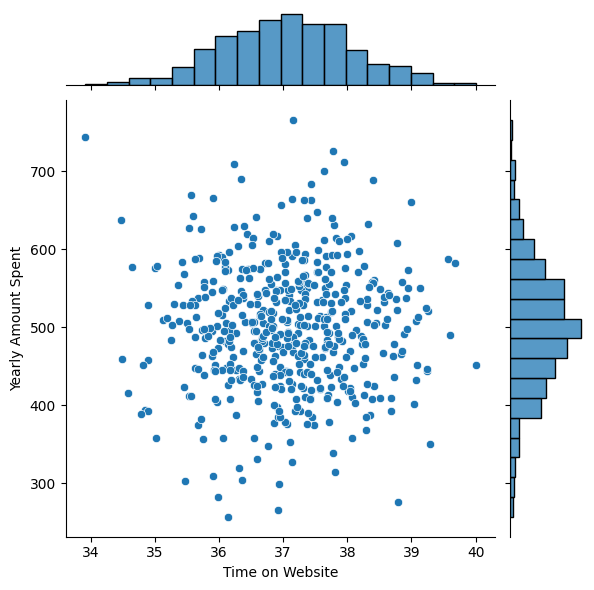

In [86]:
sns.jointplot(y= df['Yearly Amount Spent'], x=df['Time on Website'])

In [87]:
#There is no clear trend between time on web and yearly amout spent

** Do the same but with the Time on App column instead. **

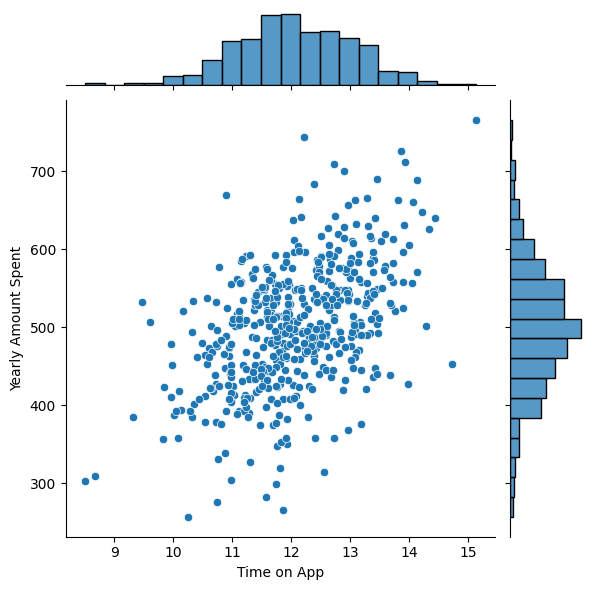

In [31]:
sns.jointplot(y= df['Yearly Amount Spent'], x=df['Time on App'])

In [ ]:
#There is definately a correlation between time on` app and yearly amount spent 

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

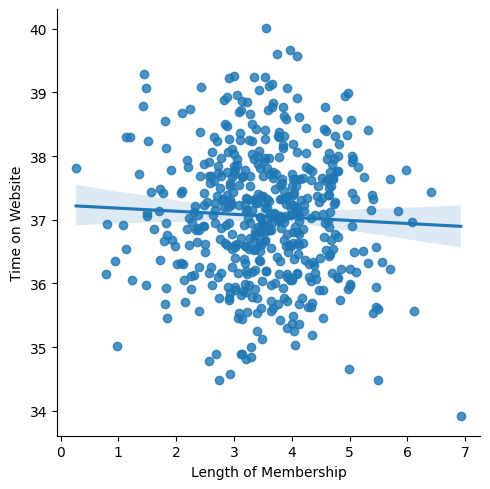

In [14]:
sns.lmplot(x = 'Length of Membership', y = 'Time on Website', data = df)

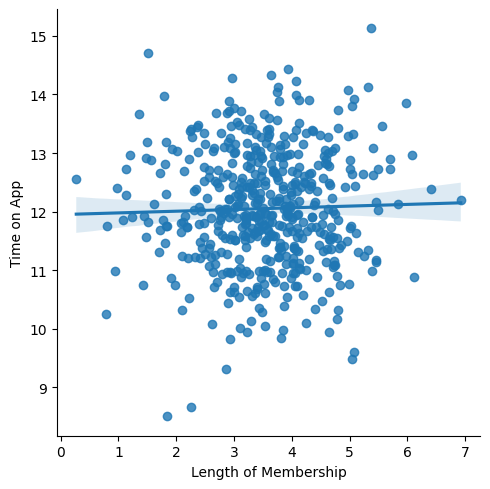

In [15]:
sns.lmplot(x = 'Length of Membership', y = 'Time on App', data = df)

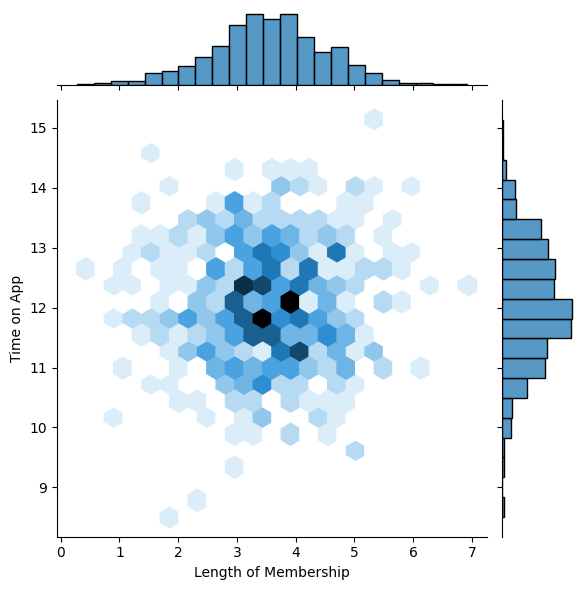

In [7]:
sns.jointplot(x= 'Length of Membership', y= 'Time on App', data = df, kind = 'hex')

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

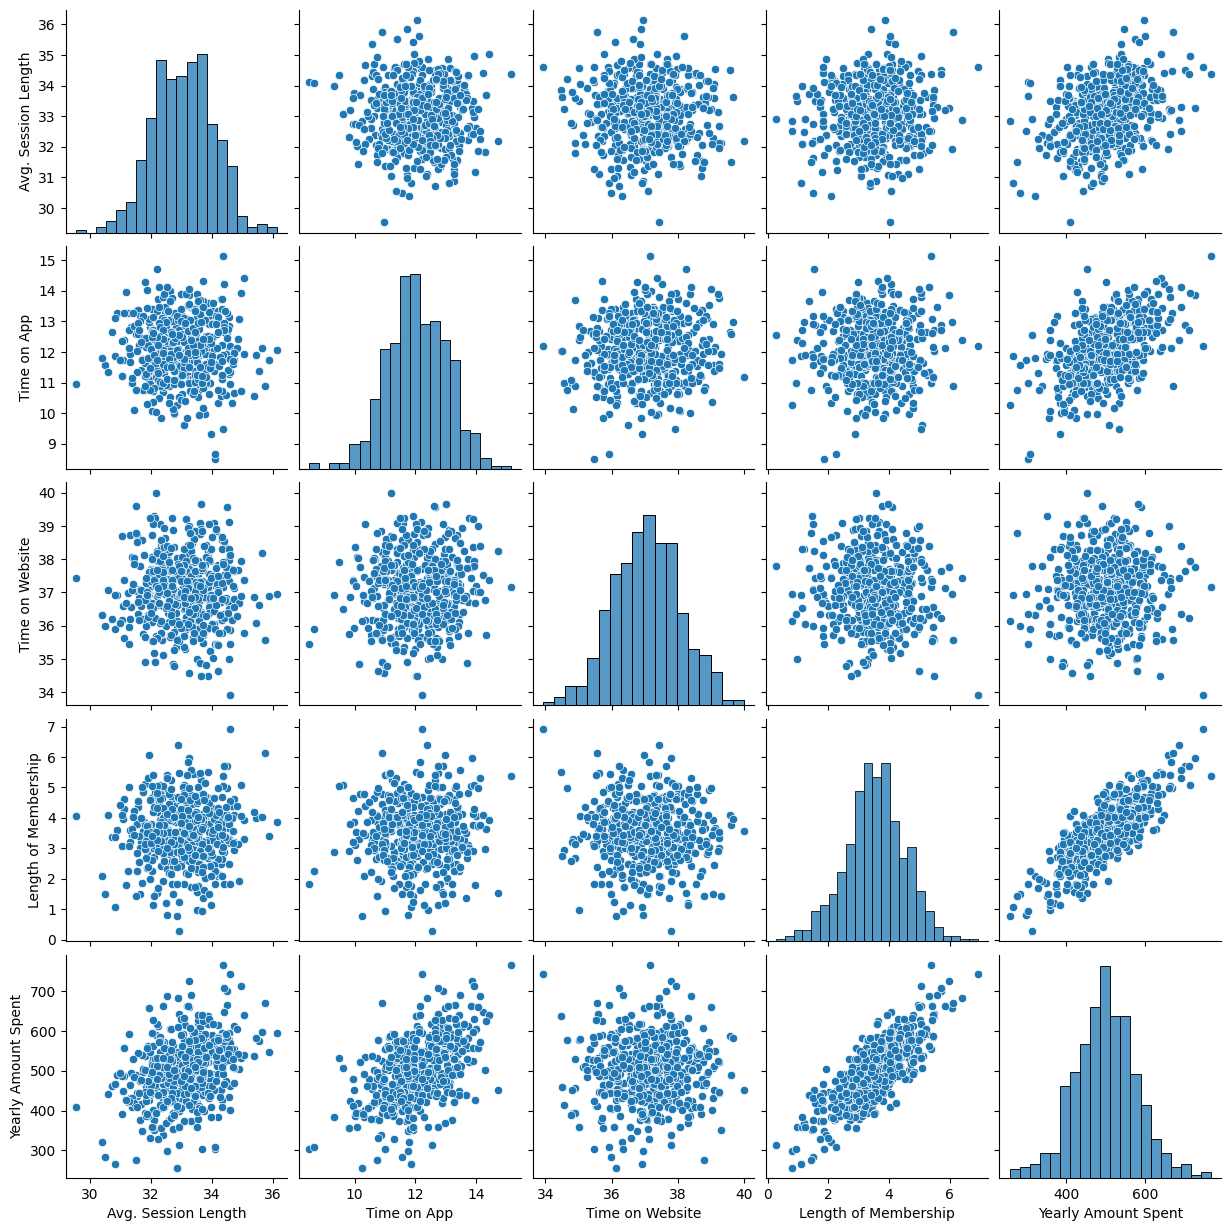

In [33]:
sns.pairplot(df)

In [ ]:
#Lenght of membership seem to be more correlated to te Yearly Amount Spent

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

**Create a linear model plot of  Yearly Amount Spent vs. Length of Membership. **

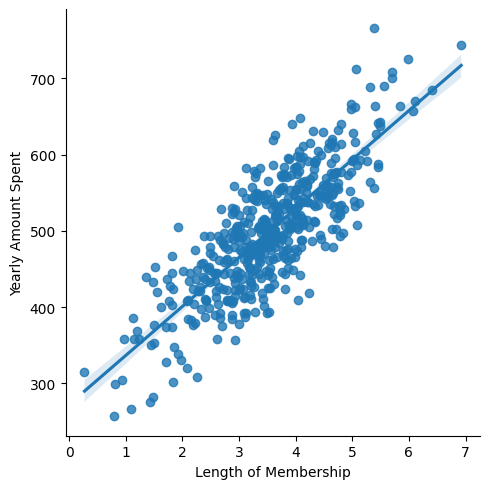

In [88]:
sns.lmplot(y = 'Yearly Amount Spent', x = 'Length of Membership', data = df)

In [18]:
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

## Training and Testing Data

splitting the data into training and testing sets.
** Variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [55]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [24]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [27]:
y = df['Yearly Amount Spent']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

In [19]:
lm = LinearRegression()

In [32]:
lm = lm.fit(X_train,y_train)
lm

LinearRegression()

**Print out the coefficients of the model**

In [111]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
 
 ### Evaluating its performance by predicting off the test values!



In [117]:
y_test

18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
          ...    
147    479.731938
346    488.387526
423    461.112248
17     407.704548
259    375.398455
Name: Yearly Amount Spent, Length: 150, dtype: float64

In [116]:
prediction = lm.predict(X_test)

predict = np.round(prediction, 2)

predict

array([456.44, 402.72, 409.25, 591.43, 590.01, 548.82, 577.6 , 715.44,
       473.79, 545.92, 337.86, 500.39, 552.93, 409.6 , 765.53, 545.84,
       693.26, 507.32, 573.11, 573.21, 397.45, 555.1 , 458.2 , 482.67,
       559.27, 413.01, 532.26, 377.65, 535.02, 447.8 , 595.54, 667.14,
       511.96, 573.3 , 505.02, 565.3 , 460.39, 449.75, 422.87, 456.56,
       598.1 , 449.65, 615.35, 511.88, 504.38, 515.95, 568.65, 551.61,
       356.56, 464.98, 481.66, 534.22, 256.29, 505.31, 520.02, 315.03,
       501.98, 387.04, 472.97, 432.87, 539.79, 590.03, 752.87, 558.28,
       523.72, 431.78, 425.38, 518.76, 641.97, 481.85, 549.7 , 380.94,
       555.18, 403.43, 472.52, 501.83, 473.56, 456.77, 554.75, 702.97,
       534.69, 619.19, 500.12, 559.44, 574.87, 505.09, 529.95, 479.21,
       424.78, 452.21, 525.74, 556.61, 425.71, 588.85, 490.77, 562.57,
       495.76, 445.18, 456.64, 537.98, 367.06, 421.13, 551.6 , 528.26,
       493.48, 495.28, 519.82, 461.16, 528.87, 442.9 , 543.2 , 350.08,
      

** Create a scatterplot of the real test values versus the predicted values. **

<Axes: ylabel='Yearly Amount Spent'>

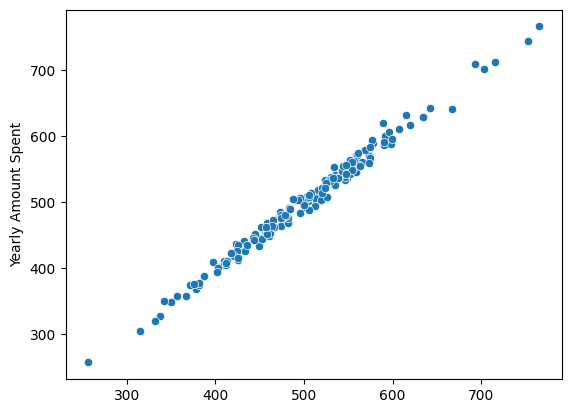

In [121]:
sns.scatterplot(y = y_test, x=prediction)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [125]:
from sklearn import metrics

In [129]:
metrics.mean_absolute_error(y_test, prediction)

7.228148653430826

In [133]:
rs = metrics.mean_squared_error(y_test, prediction)
rs

79.81305165097427

In [134]:
np.sqrt(rs)

8.933815066978624

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

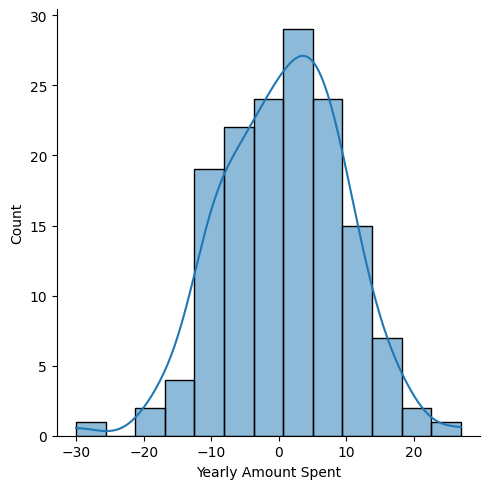

In [136]:
sns.displot(prediction-y_test, kde=True)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [144]:
import pandas as pd

pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])


,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

For a one-unit increase in Avg. Session Length, the response variable is expected to increase by 25.981550 units, holding all other predictor variables constant

For a one-unit increase in Time on App, the response variable is expected to increase by 38.590159 units, holding all other predictor variables constant.

For a one-unit increase in Time on Website, the response variable is expected to increase by 0.190405 units, holding all other predictor variables constant.

For a one-unit increase in Length of Membership, the response variable is expected to increase by 61.279097 units, holding all other predictor variables constant.

**Do you think the company should focus more on their mobile app or on their website?**

I think the company should try to focus more on their mobile app than the website

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.